# Initial Try Outs - Failed Attempts.

In [ ]:
!git clone https://github.com/MKLab-ITI/intermediate-cnn-features.git
!wget http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz
!pip install tensorflow==1.5
!tar -xvzf ./vgg_16_2016_08_28.tar.gz

In [ ]:
!python ./intermediate-cnn-features/feature_extraction.py --video_list ./traffic_video_list --network vgg --framework tensorflow --output_path test/ --tf_model ./vgg_16.ckpt
!echo ./sherbrooke_video.mp4 > traffic_video_list

In [ ]:
!echo $PWD

/content


In [ ]:
video_list = [
              ["video_path", "feature_path"], 
              ["/content/sherbrooke_video.mp4", "/content/sherbrooke_video_features.mp4"]
            ]

import csv

with open('videolist.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(video_list)

In [ ]:
!git clone https://github.com/antoine77340/video_feature_extractor.git

Cloning into 'video_feature_extractor'...
remote: Enumerating objects: 101, done.
remote: Total 101 (delta 0), reused 0 (delta 0), pack-reused 101
Receiving objects: 100% (101/101), 163.69 KiB | 868.00 KiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
!python ./video_feature_extractor/extract.py --csv=videolist.csv --type=2d --batch_size=64 --num_decoding_thread=4

Traceback (most recent call last):
  File "./video_feature_extractor/extract.py", line 7, in <module>
    from model import get_model
  File "/content/video_feature_extractor/model.py", line 21
    model = nn.Sequential(*list(model.children())[:-2], GlobalAvgPool())
SyntaxError: only named arguments may follow *expression


In [ ]:
!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp27-none-any.whl size=6085 sha256=d4f41dc7c88523efd16560cd91ff4d7e7a227f4755eaff66995f41927d7eaf83
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [ ]:
!pip install tensorflow==1.5

     |████████████████████████████████| 44.4MB 94kB/s 
     |████████████████████████████████| 3.0MB 33.3MB/s 
     |████████████████████████████████| 890kB 33.7MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp27-none-any.whl size=107221 sha256=aee1dcd3b78cbe460592f0ceb84af0586e7f55a42c2b890fac6bb14f52f03fe3
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.0
    Uninstalling bleach-3.1.0:
      Successfully uninstalled bleach-3.1.0
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


# Sucsessful Attempt

##Test

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!git clone https://github.com/somewacko/deep-features-video.git

In [ ]:
!pip install keras==2.1.5
!mkdir video_dir
!mv ./sherbrooke_video.mp4 ./video_dir

In [ ]:
!python deep-features-video/extract_features.py -i ./video_dir -o ./features_output

In [ ]:
#!/usr/bin/env python3
"""
extract_features.py
Script to extract CNN features from video frames.
"""

from __future__ import print_function

import argparse
import os
import sys

from moviepy.editor import VideoFileClip
import numpy as np
import scipy.misc
from tqdm import tqdm

import tensorflow as tf


def crop_center(im):
    """
    Crops the center out of an image.
    Args:
        im (numpy.ndarray): Input image to crop.
    Returns:
        numpy.ndarray, the cropped image.
    """

    h, w = im.shape[0], im.shape[1]

    if h < w:
        return im[0:h,int((w-h)/2):int((w-h)/2)+h,:]
    else:
        return im[int((h-w)/2):int((h-w)/2)+w,0:w,:]


def extract_features(input_dir, output_dir, model_type='inceptionv3', batch_size=32):
    """
    Extracts features from a CNN trained on ImageNet classification from all
    videos in a directory.
    Args:
        input_dir (str): Input directory of videos to extract from.
        output_dir (str): Directory where features should be stored.
        model_type (str): Model type to use.
        batch_size (int): Batch size to use when processing.
    """

    input_dir = os.path.expanduser(input_dir)
    output_dir = os.path.expanduser(output_dir)


    if not os.path.isdir(input_dir):
        sys.stderr.write("Input directory '%s' does not exist!\n" % input_dir)
        sys.exit(1)


    # Load desired ImageNet model
    
    # Note: import Keras only when needed so we don't waste time revving up
    #       Theano/TensorFlow needlessly in case of an error

    model = None
    shape = (224, 224)


    # if model_type.lower() == 'inceptionv3':
    from keras.applications import InceptionV3
    model = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet')
    # elif model_type.lower() == 'xception':
    #     from keras.applications import Xception
    #     model = Xception(include_top=True, weights='imagenet')
    # elif model_type.lower() == 'resnet50':
    #     from keras.applications import ResNet50
    #     model = ResNet50(include_top=True, weights='imagenet')
    # elif model_type.lower() == 'vgg16':
    #     from keras.applications import VGG16
    #     model = VGG16(include_top=True, weights='imagenet')
    # elif model_type.lower() == 'vgg19':
    #     from keras.applications import VGG19
    #     model = VGG19(include_top=True, weights='imagenet')
    # else:
    #     sys.stderr.write("'%s' is not a valid ImageNet model.\n" % model_type)
    #     sys.exit(1)

    if model_type.lower() == 'inceptionv3' or model_type.lower() == 'xception':
        shape = (299, 299)

    # Get outputs of model from layer just before softmax predictions

    from keras.models import Model
    model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[-2].output)


    # Create output directories

    visual_dir = os.path.join(output_dir, 'visual') # RGB features
    #motion_dir = os.path.join(output_dir, 'motion') # Spatiotemporal features
    #opflow_dir = os.path.join(output_dir, 'opflow') # Optical flow features

    for directory in [visual_dir]:#, motion_dir, opflow_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)


    # Find all videos that need to have features extracted

    def is_video(x):
        return x.endswith('.mp4') or x.endswith('.avi') or x.endswith('.mov')

    vis_existing = [x.split('.')[0] for x in os.listdir(visual_dir)]
    #mot_existing = [os.path.splitext(x)[0] for x in os.listdir(motion_dir)]
    #flo_existing = [os.path.splitext(x)[0] for x in os.listdir(opflow_dir)]

    video_filenames = [x for x in sorted(os.listdir(input_dir))
                       if is_video(x) and os.path.splitext(x)[0] not in vis_existing]


    # Go through each video and extract features

    from keras.applications.imagenet_utils import preprocess_input

    for video_filename in tqdm(video_filenames):

        # Open video clip for reading
        try:
            clip = VideoFileClip( os.path.join(input_dir, video_filename) )
        except Exception as e:
            sys.stderr.write("Unable to read '%s'. Skipping...\n" % video_filename)
            sys.stderr.write("Exception: {}\n".format(e))
            continue

        # Sample frames at 1fps
        fps = int( np.round(clip.fps) )
        frames = [scipy.misc.imresize(crop_center(x.astype(np.float32)), shape)
                  for idx, x in enumerate(clip.iter_frames()) if idx % fps == fps//2]


        n_frames = len(frames)

        frames_arr = np.empty((n_frames,)+shape+(3,), dtype=np.float32)
        for idx, frame in enumerate(frames):
            frames_arr[idx,:,:,:] = frame

        frames_arr = preprocess_input(frames_arr)

        features = model.predict(frames_arr, batch_size=batch_size)

        name, _ = os.path.splitext(video_filename)
        feat_filepath = os.path.join(visual_dir, name+'.npy')

        with open(feat_filepath, 'wb') as f:
            np.save(f, features)


In [ ]:
extract_features(input_dir="./video_dir", output_dir="./features_output")

In [ ]:
from google.colab import files
uploaded = files.upload()
print("====", uploaded.keys()[0])

In [ ]:
im.fromarray(frames[5])

## Our Attempt
### *Run After*

In [2]:
!pip install keras==2.1.5
!mkdir video_dir

  Using cached https://files.pythonhosted.org/packages/ba/65/e4aff762b8696ec0626a6654b1e73b396fcc8b7cc6b98d78a1bc53b85b48/Keras-2.1.5-py2.py3-none-any.whl
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
mkdir: cannot create directory ‘video_dir’: File exists


In [ ]:
from google.colab import files
import os

uploaded = files.upload()

In [154]:
for file_name in uploaded.keys():
    print(file_name)
    os.system("mv ./%s ./video_dir"%(file_name))

sherbrooke_video.mp4


In [6]:
from __future__ import print_function

import argparse
import os
import sys

from moviepy.editor import VideoFileClip
import numpy as np
import scipy.misc
from tqdm import tqdm
from PIL import Image as im

import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def crop_center(im):

    h, w = im.shape[0], im.shape[1]

    if h < w:
        return im[0:h,int((w-h)/2):int((w-h)/2)+h,:]
    else:
        return im[int((h-w)/2):int((h-w)/2)+w,0:w,:]

def is_video(x):
    return x.endswith('.mp4') or x.endswith('.avi') or x.endswith('.mov')

def plot_images(i):
    plt.figure(figsize=(50, 100))
    plt.subplot(1, 2, 1)
    plt.imshow(im.fromarray(frames[i]))
    plt.subplot(1, 2, 2)
    plt.imshow(im.fromarray(frames[i+1]))

def frame_extractor(clip, fps):
    new_fps = int( np.round(clip.fps) )/fps
    frames = [scipy.misc.imresize(crop_center(x.astype(np.float32)), shape) # numpy.array(Image.fromarray(arr).resize())
                for idx, x in enumerate(clip.iter_frames()) if idx % new_fps == new_fps//2]
    return frames

In [173]:
input_dir = os.path.expanduser("./video_dir")
output_dir = os.path.expanduser("./out_dir")
batch_size = 32

visual_dir = os.path.join(output_dir, 'visual')
for directory in [visual_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

vis_existing = [x.split('.')[0] for x in os.listdir(visual_dir)]

video_filenames = [x for x in sorted(os.listdir(input_dir))
                    if is_video(x) and os.path.splitext(x)[0] not in vis_existing]

In [176]:
model = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet')

shape = (299, 299)
model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[-2].output)

from keras.applications.imagenet_utils import preprocess_input

for video_filename in tqdm(video_filenames):

    try:
        clip = VideoFileClip( os.path.join(input_dir, video_filename) )
    except Exception as e:
        print("Unable to read '%s'. Skipping...\n" % video_filename)
        print("Exception: {}\n".format(e))
        continue

    frames = frame_extractor(clip, 2)

    n_frames = len(frames)

    frames_arr = np.empty((n_frames,) + shape+(3, ), dtype=np.float32)
    for idx, frame in enumerate(frames):
        frames_arr[idx, :, :, :] = frame

    frames_arr = preprocess_input(frames_arr)
    features = model.predict(frames_arr, batch_size=batch_size)

  0%|          | 0/1 [00:00<?, ?it/s]W0516 10:42:53.236821 140577878701952 utils.py:100] /usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.

100%|██████████| 1/1 [00:57<00:00, 57.17s/it]


In [177]:
print(n_frames)

267


In [178]:
normalised_features = tf.keras.utils.normalize(features, axis=0)
diff_features = np.diff(normalised_features, axis=0)
squared_diff = np.square(diff_features)
sum_squared_diff = np.sum(squared_diff, axis=1)

In [179]:
print(features[:10, 0])
print(normalised_features[:10, 0])
print(diff_features[:10, 0])
print(squared_diff[:10, 0])
print(sum_squared_diff[:10])

[0.         0.         0.30043542 1.032334   0.35389692 0.
 0.         0.         0.         0.        ]
[0.         0.         0.04462959 0.15335289 0.05257128 0.
 0.         0.         0.         0.        ]
[ 0.          0.04462959  0.1087233  -0.1007816  -0.05257128  0.
  0.          0.          0.          0.04063769]
[0.         0.0019918  0.01182076 0.01015693 0.00276374 0.
 0.         0.         0.         0.00165142]
[1.1962682  1.7259187  2.3132668  2.3901687  2.4879065  0.6862496
 0.48217905 0.56127167 1.2700768  3.924737  ]


In [180]:
np.argmax(sum_squared_diff)

137

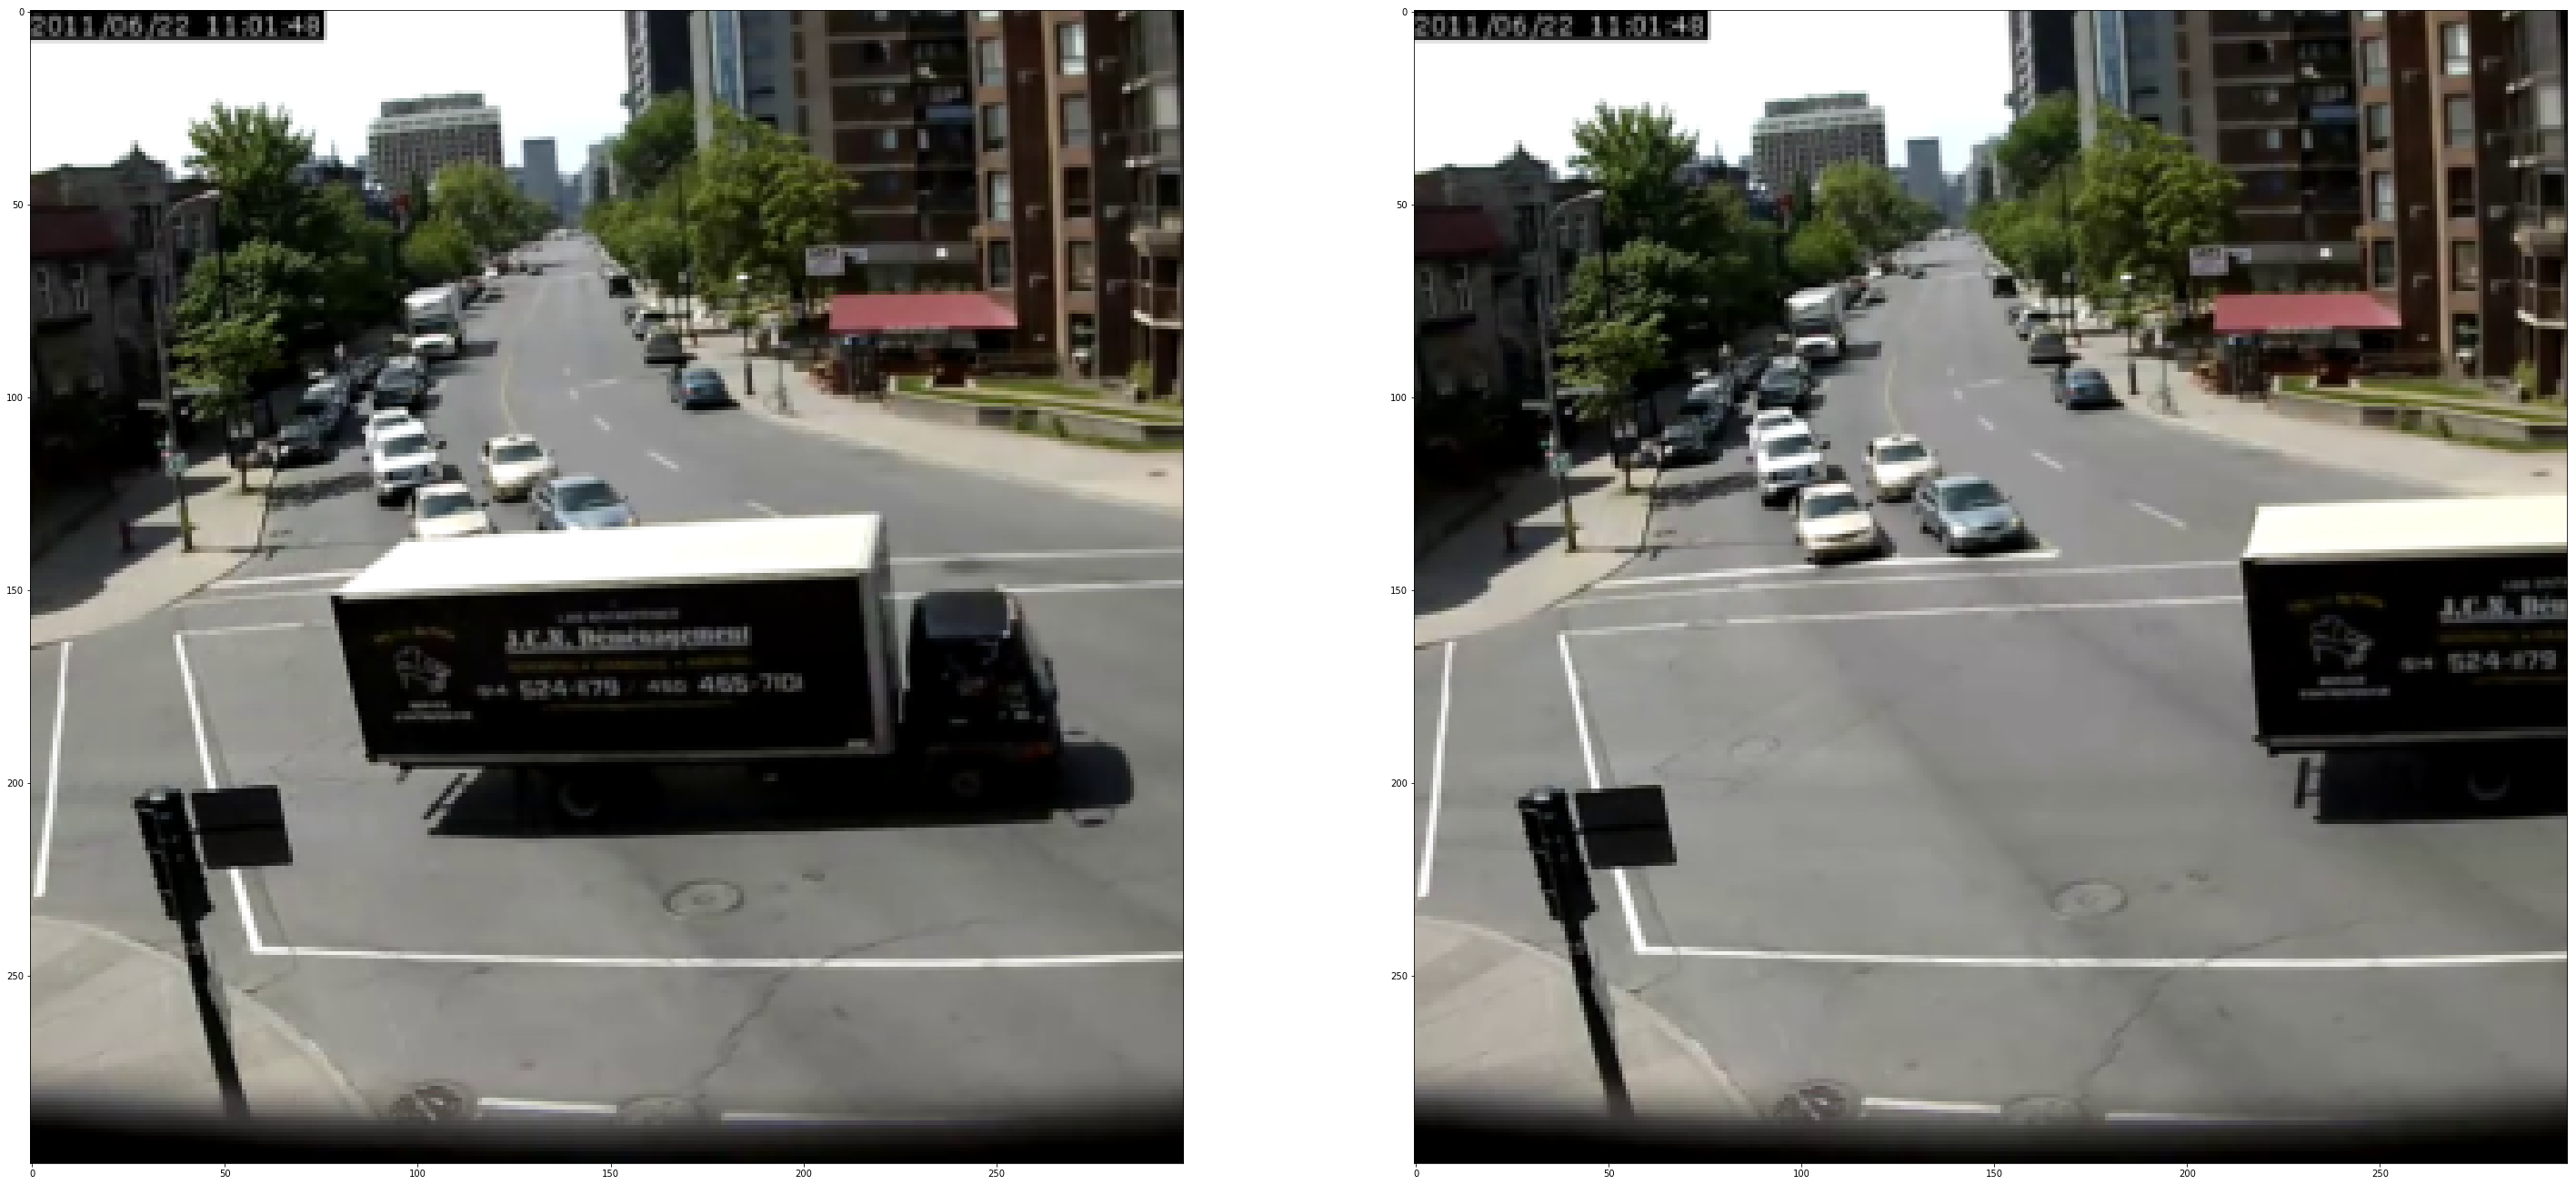

In [181]:
plot_images(137)

In [ ]:
diff_features[:, 0].shape

(132,)

In [7]:
clip = VideoFileClip("./video_dir/sherbrooke_video.mp4")

In [12]:
fps = int( np.round(clip.fps) )/2
frames = [np.array(im.fromarray(crop_center(x.astype(np.float32))).resize(size=shape)) for idx, x in enumerate(clip.iter_frames()) if idx % fps == fps//2]
# np.array(Image.fromarray(crop_center(x.astype(np.float32))).resize(size=shape))
n_frames = len(frames)
print(fps, n_frames)

TypeError: ignored